In [2]:
# install python-poloniex
!pip install https://github.com/s4w3d0ff/python-poloniex/archive/v0.4.6.zip

     / 40kB 112kB/s
    100% |################################| 92kB 2.1MB/s ta 0:00:01
    100% |################################| 143kB 2.6MB/s ta 0:00:01
    100% |################################| 61kB 3.7MB/s ta 0:00:011
    100% |################################| 133kB 2.8MB/s ta 0:00:01
  Running setup.py install for poloniex ... done


In [3]:
import poloniex

In [5]:
import time

# prep poloniex API
polo = poloniex.Poloniex()

# 5min(300 seconds)100days
chart_data = polo.returnChartData('BTC_ETH', period=300, start=time.time()-polo.DAY*100, end=time.time())
#poloniex source code which explain how interval data we can get
#https://github.com/s4w3d0ff/python-poloniex

In [10]:
# import pandas
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

price_data = pd.DataFrame([float(i.get('open')) for i in chart_data])
mss = MinMaxScaler()
input_dataframe = pd.DataFrame(mss.fit_transform(price_data))


In [12]:
#devide into training data and validation data

import numpy as np

def _load_data(data, n_prev=50):
    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)
    return alsX, alsY

#trainning data is 70%. Validationdata is 30%
def train_test_split(df, test_size=0.3, n_prev=50):
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)
    return (X_train, y_train), (X_test, y_test)

(X_train, y_train), (X_test, y_test) = train_test_split(input_dataframe)

In [15]:
!pip install keras

    100% |################################| 327kB 1.8MB/s ta 0:00:01
    100% |################################| 256kB 2.1MB/s ta 0:00:01
  Running setup.py bdist_wheel for pyyaml ... done
  Stored in directory: /root/.cache/pip/wheels/2c/f7/79/13f3a12cd723892437c0cfbde1230ab4d82947ff7b3839a4fc
Successfully built pyyaml


In [16]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

in_out_neurons = 1
hidden_neurons = 300
length_of_sequences = 50

model = Sequential()
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="adam",)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM

in_out_neurons = 1
hidden_neurons = 300
length_of_sequences = 50

model = Sequential()
model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="adam",)

In [18]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=0)
history = model.fit(X_train, y_train, batch_size=600, epochs=10, validation_split=0.1, callbacks=[early_stopping])

Train on 18099 samples, validate on 2011 samples
Epoch 1/10
18099/18099 [==============================] - 45s 3ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 2/10
18099/18099 [==============================] - 45s 2ms/step - loss: 2.5816e-04 - val_loss: 3.4416e-04
Epoch 3/10
18099/18099 [==============================] - 42s 2ms/step - loss: 2.2754e-05 - val_loss: 2.9926e-05
Epoch 4/10
18099/18099 [==============================] - 41s 2ms/step - loss: 1.2393e-05 - val_loss: 2.4886e-05
Epoch 5/10
18099/18099 [==============================] - 42s 2ms/step - loss: 1.1886e-05 - val_loss: 2.4197e-05
Epoch 6/10
18099/18099 [==============================] - 47s 3ms/step - loss: 1.1829e-05 - val_loss: 2.4798e-05


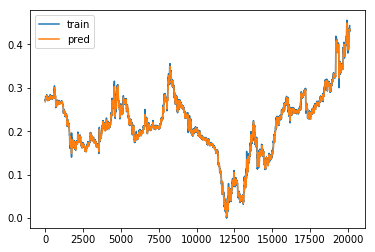

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt

pred_data = model.predict(X_train)
plt.plot(y_train, label='train')
plt.plot(pred_data, label='pred')
plt.legend(loc='upper left')
plt.show()

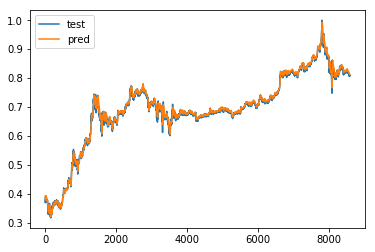

In [22]:
pred_data = model.predict(X_test)
plt.plot(y_test, label='test')
plt.plot(pred_data, label='pred')
plt.legend(loc='upper left')
plt.show()

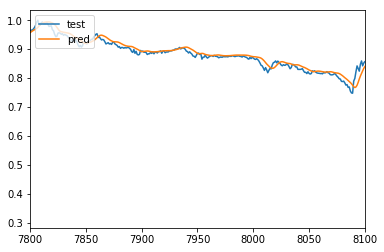

In [23]:
pred_data = model.predict(X_test)
plt.plot(y_test, label='test')
plt.plot(pred_data, label='pred')
plt.legend(loc='upper left')
plt.xlim(7800, 8100)
plt.show()